# **Import the dataset:**

In [ ]:
#import all libraries needed:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
import seaborn as sns


adultDF= pd.read_csv("https://raw.githubusercontent.com/CalColistra/IDS/main/Project6/problem1/adult_training.csv")
adultDF.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


# **Prepare Data before making models:**

In [ ]:
# Create a new predictor combining capital gains + absolute value of capital loss
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])

# Create a new dataframe for the classification
new_adultDF = adultDF.filter(['age', 'workclass', 'education','marital-status', 'sex','capital-gains-losses','income'], axis=1)

In [ ]:
#encode the categoric columns
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)

,age,workclass,education,marital-status,sex,capital-gains-losses,income
0,50,6,13,2,1,0,0
1,38,4,9,0,1,0,0
2,49,4,5,3,0,0,0
3,52,6,9,2,1,0,1
4,31,4,14,4,0,14084,1
5,40,4,11,2,1,0,1
6,38,4,7,2,1,0,0
7,43,4,7,2,1,2042,0
8,54,0,10,2,1,0,1
9,39,4,9,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['age', 'workclass','education','marital-status','sex','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

In [ ]:
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 6)
Test size: (2960, 6)


# **Create 4 functions:**
1. makeDTModel()
2. displayTree()
3. displayCM()
4. compareModels()


**makeDTModel() function:**

In [ ]:
#arguemnts:
#type is the type of model: either "gini" or "entropy"
#spec is an int 1 or 2. 
#     if spec = 1 then numNodes indicates the max leaf nodes of the tree
#     if spec = 2 then numNodes indicates the max depth of the tree
#X_train is the predictor training values
#y_train is the target training values
def makeDTModel(type, numNodes, X_train, y_train, spec):
  if spec == 1:
    model = DecisionTreeClassifier(criterion = type, 
                                     max_leaf_nodes=numNodes,
                                     random_state = 120).fit(X_train, y_train)
  if spec == 2:
    model = DecisionTreeClassifier(criterion = type, 
                                     max_depth=numNodes,
                                     random_state = 120).fit(X_train, y_train)
  return model

**displayTree() function:**

In [ ]:
#arguemnts:
#classifier is the model that contains the decision tree classifier
#X is the dataset containing the predictor values
#cn is a group of labels for the predictors
def displayTree(classifier, X, cn):
  # Control the figure size
  from matplotlib.pyplot import figure
  figure(figsize=(12, 10), dpi=80)
  # Plot the tree
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), class_names=cn, filled = True)

**displayCM() function:**

In [ ]:
#function to make and display the confusion matrix in text and heatmap
#arguemnts:
#classifier is the model that contains the decision tree classifier
#X_train is the predictor training values
#y_train is the target training values
#X_test is the predictor testing values
#y_test is the target testing values
def displayCM(classifier, X_train, y_train, X_test, y_test):
  predictions = classifier.predict(X_test)
  cm = confusion_matrix(y_true = y_test, y_pred = predictions)
  print(cm)
  plt.figure(figsize=(8,8))  #control the size of the heatmap
  #create the heatmap
  sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')  #label y axis of heatmap
  plt.xlabel('Predicted label')  #label x axis of heatmap

**compareModels() function:**

In [ ]:
#function to plot the side by side model comparisons
#arguments:
#label1 and label2 are strings to label each classifier
#trainScore1 and testScore1 are scores for the classifer model in label1
#trainScore2 and testScore2 are scores for the classifer model in label2
def compareModels(label1, label2, trainScore1, testScore1, trainScore2, testScore2):
  labels = [label1, label2]
  training_scores = [trainScore1, trainScore2]
  testing_scores =  [testScore1, testScore2]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

# **Setup and Call all functions:**

**Make decision tree models:**

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", 5, X_train, y_train, 1)  #model for cart
c5_classifier = makeDTModel("entropy", 5, X_train, y_train, 1)  #model for c5

**Display trees for both models:**

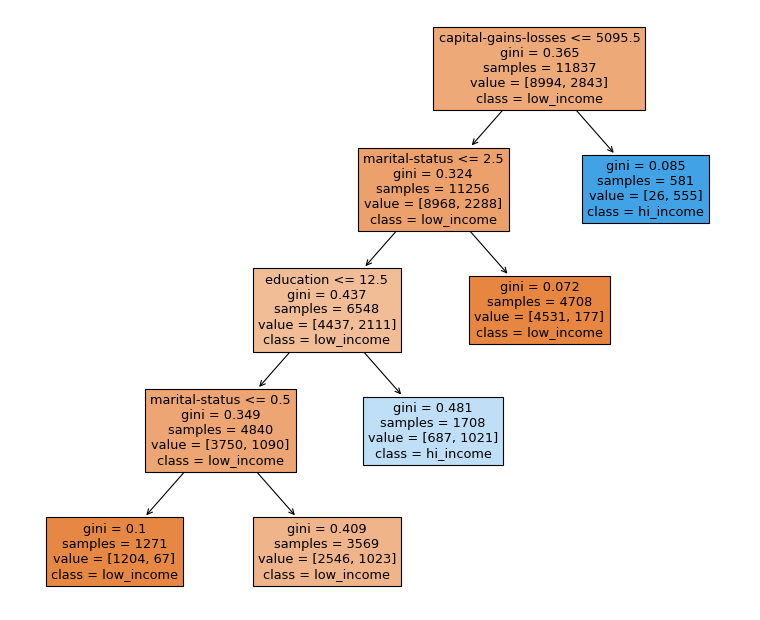

In [ ]:
cn = ['low_income', 'hi_income']  # labels to be passed to displayTree()
displayTree(cart_classifier, X, cn)  #call to print the cart decision tree

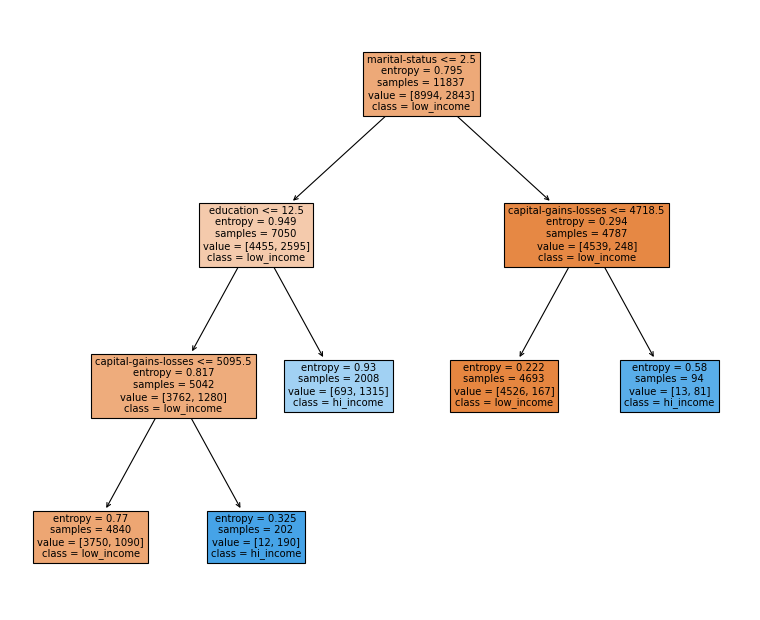

In [ ]:
displayTree(c5_classifier, X, cn)  #call to print the c5 decision tree

**Show the confusion matrix in text and heatmap for both models:**

[[2083  166]
 [ 352  359]]


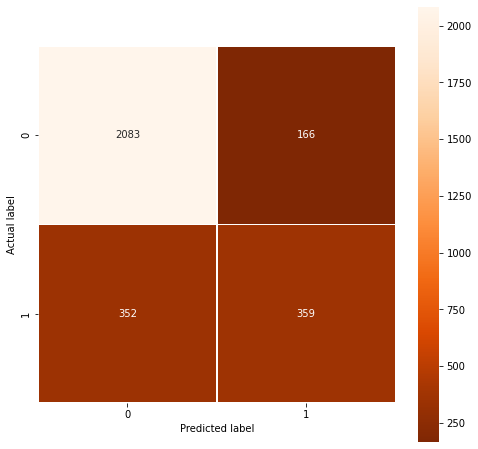

In [ ]:
#call the confusion matrix function for the cart model
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

[[2080  169]
 [ 352  359]]


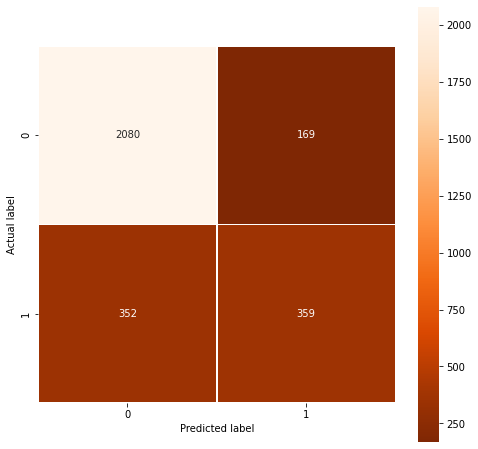

In [ ]:
#call the confusion matrix function for the c5 model
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

**Compare the classification accuracy scores for both models:**

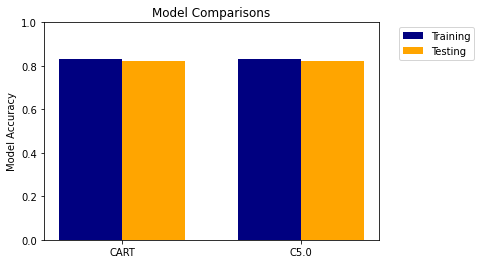

In [ ]:
#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

**Analyze the effect of the parameters max_depth and max_leaf_nodes on classification accuracy. Plot the obtained accuracy values for various choices of max_depth (e.g. 2, 3, 4, none) and max_leaf_nodes (3, 4, 5, none).**

Try making new models with (max_leaf_nodes = **2**) and compare their scores

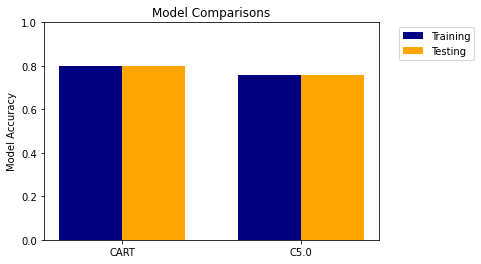

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", 2, X_train, y_train, 1)  #model for cart
c5_classifier = makeDTModel("entropy", 2, X_train, y_train, 1)  #model for c5

#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

Try making new models with (max_leaf_nodes = **4**) and compare their scores

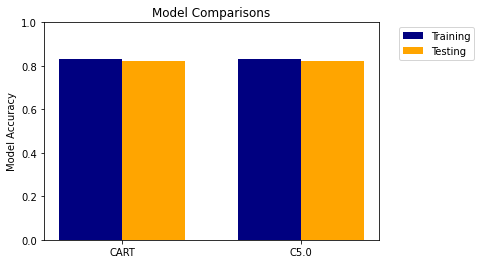

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", 4, X_train, y_train, 1)  #model for cart
c5_classifier = makeDTModel("entropy", 4, X_train, y_train, 1)  #model for c5

#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

Try making new models with (max_leaf_nodes = **40**) and compare their scores

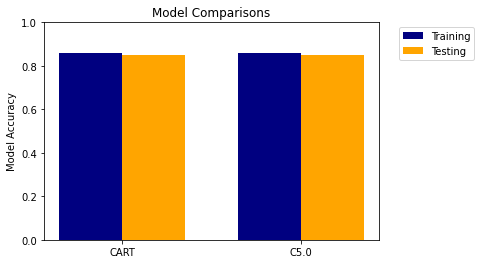

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", 40, X_train, y_train, 1)  #model for cart
c5_classifier = makeDTModel("entropy", 40, X_train, y_train, 1)  #model for c5

#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

Try making new models with (max_leaf_nodes = **100**) and compare their scores

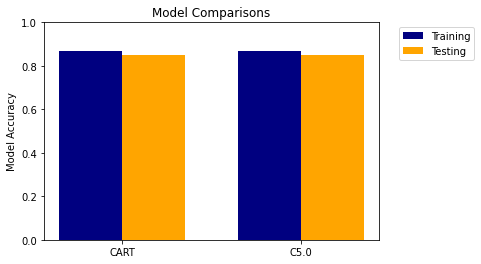

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", 100, X_train, y_train, 1)  #model for cart
c5_classifier = makeDTModel("entropy", 100, X_train, y_train, 1)  #model for c5

#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

Try making new models with (max_leaf_nodes = **None**) and compare their scores

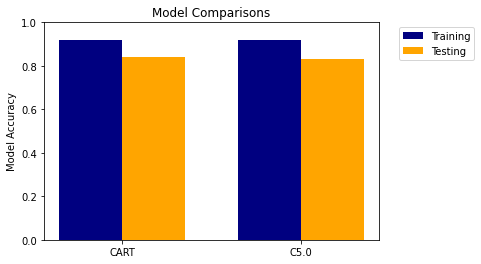

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", None, X_train, y_train, 1)  #model for cart
c5_classifier = makeDTModel("entropy", None, X_train, y_train, 1)  #model for c5

#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

Try making new models with (max_depth = **2**) and compare their scores

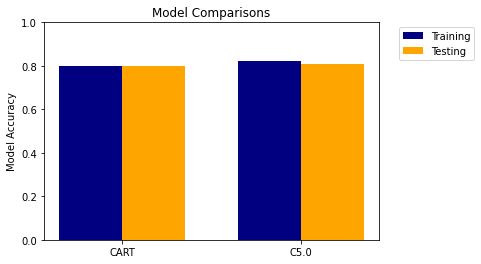

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", 2, X_train, y_train, 2)  #model for cart
c5_classifier = makeDTModel("entropy", 2, X_train, y_train, 2)  #model for c5

#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

Try making new models with (max_depth = **4**) and compare their scores

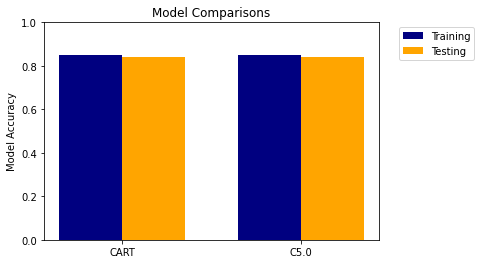

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", 4, X_train, y_train, 2)  #model for cart
c5_classifier = makeDTModel("entropy", 4, X_train, y_train, 2)  #model for c5

#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

Try making new models with (max_depth = **40**) and compare their scores

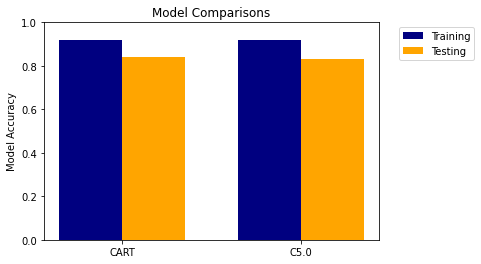

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", 40, X_train, y_train, 2)  #model for cart
c5_classifier = makeDTModel("entropy", 40, X_train, y_train, 2)  #model for c5

#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

Try making new models with (max_depth = **100**) and compare their scores

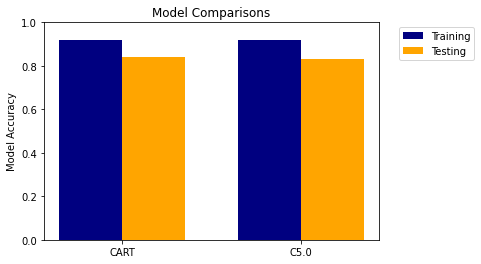

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", 100, X_train, y_train, 2)  #model for cart
c5_classifier = makeDTModel("entropy", 100, X_train, y_train, 2)  #model for c5

#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

Try making new models with (max_depth = **None**) and compare their scores

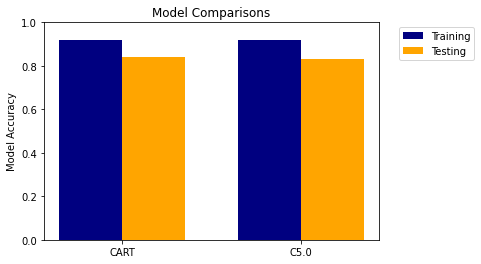

In [ ]:
#call to make the decision tree models:
cart_classifier = makeDTModel("gini", None, X_train, y_train, 2)  #model for cart
c5_classifier = makeDTModel("entropy", None, X_train, y_train, 2)  #model for c5

#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

#calculate classification accuracy scores for c5 model:
trainScore2 = round(c5_classifier.score(X_train, y_train), 2) # training score
testScore2 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

#call the function to compare models
compareModels("CART", "C5.0", trainScore1, testScore1, trainScore2, testScore2)

**Summary:**
- Increasing the max leaf nodes somewhat increased the models classification accuracy scores.  When max leaf node = None there was the biggest increase in the training accuracy score.

- Increasing max depth also increased the models classification accuracy scores.

- This makes sense because with more nodes in the tree the model has more data and info gain and therefor it should become more accurate.

- It is also important to note that when max_leaf_nodes and max_depth = None , the classification accuracy scores are about the same as the scores for max_leaf_nodes and max_depth = 100.  I did not expect this outcome becasue with no nodes in the tree there is no info gain and therefore I don't understand how accuracy could be so high.